<a href="https://colab.research.google.com/github/LorenzoBertozzi/CEC-2020-MMF12_l/blob/main/CEVO_trabalho4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install Platypus-Opt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 4.9 MB/s eta 0:00:00


In [5]:
from platypus import NSGAII, Problem, Real, Hypervolume
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
#paremetros
n_p = 2
q = 1
num_runs = 21  # Número de rodadas

In [6]:
def g(x):
    return 2 - np.exp(-2 * np.log(2) * ((x - 0.1) / 0.8) ** 2) * (np.sin(n_p * np.pi * x) ** 6)

def h(f1, g_val):
    return 1 - (f1 / g_val) ** 2 - (f1 / g_val) * np.sin(2 * np.pi * q * f1)

def f2(x):
    g_val = g(x[1])
    return g_val * h(x[0], g_val)

def MMF12_l(x):
    return [x[0], f2(x)]

# Definição do problema
problem = Problem(2, 2)
problem.types[:] = [Real(0, 2), Real(0, 2)]
problem.function = MMF12_l

# Execução do algoritmo
algorithm = NSGAII(problem)
algorithm.run(200000)

In [7]:
# Extraindo os ótimos globais e locais de g(x)
x_vals = np.linspace(0, 1, 1000)
g_vals = g(x_vals)
g_opt_global = max(g_vals)  # Ótimo global de g(x)
g_opt_local = sorted(set(g_vals))[-2]  # Segundo maior valor de g(x), aproximando um ótimo local

In [8]:
# Definição dos PFs descontínuos
pf_global_x = np.linspace(0, g_opt_global, 100)
pf_global_y = g_opt_global * h(pf_global_x, g_opt_global)

pf_local_x = np.linspace(0, g_opt_local, 100)
pf_local_y = g_opt_local * h(pf_local_x, g_opt_local)

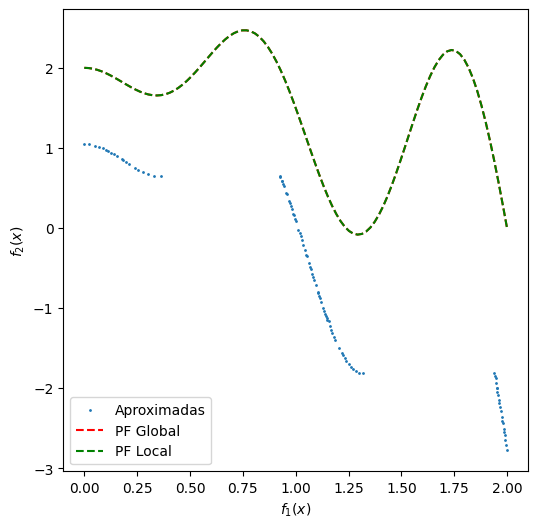

In [9]:
plt.figure(figsize=(6,6))
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result], s=1, label="Aproximadas")
plt.plot(pf_global_x, pf_global_y, 'r--', label="PF Global")
plt.plot(pf_local_x, pf_local_y, 'g--', label="PF Local")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.legend()
plt.show()

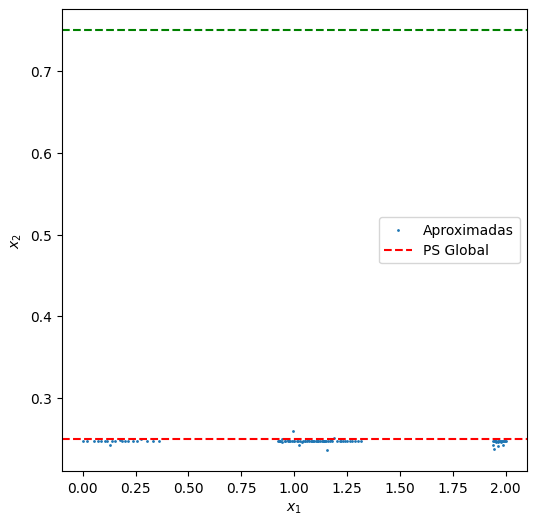

In [10]:
# Plotando o espaço de busca com as PSs
plt.figure(figsize=(6,6))
plt.scatter([s.variables[0] for s in algorithm.result],
            [s.variables[1] for s in algorithm.result], s=1, label="Aproximadas")
plt.axhline(1 / (2 * n_p), color='r', linestyle='--', label="PS Global")
for i in range(2, n_p+1):
    plt.axhline(1 / (2 * n_p) + (1 / n_p) * (i - 1), color='g', linestyle='--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()


PS Verdadeiro Mais Preciso:

O PS verdadeiro foi gerado com mais pontos (500 em vez de 100) para maior precisão.

Aumento do Número de Avaliações:

O número de avaliações foi aumentado para 50000 para permitir uma exploração mais completa do espaço de busca.

Visualização das Soluções:

Adicionado um gráfico que mostra as soluções encontradas em relação ao PS verdadeiro.

Tamanho da População:

O tamanho da população foi ajustado para 100 para melhorar a diversidade das soluções.

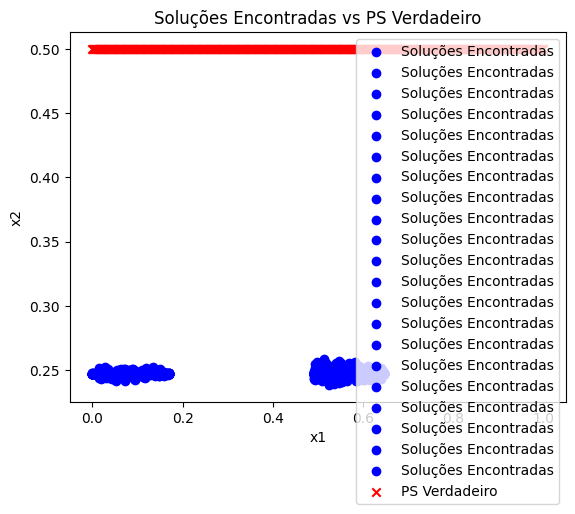

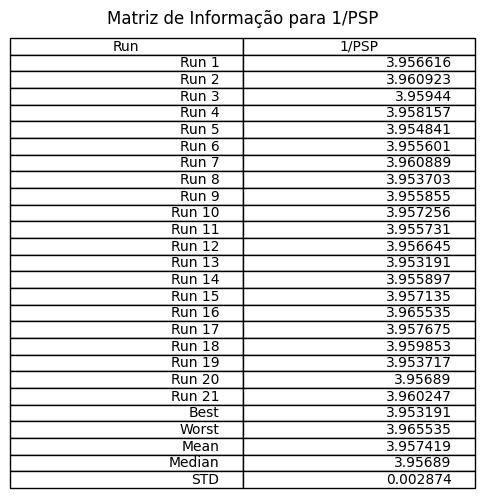

In [15]:
from platypus import NSGAII, Problem, Real
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Definição do problema MMF12
def g(x):
    return 2 - np.exp(-2 * np.log(2) * ((x - 0.1) / 0.8) ** 2) * (np.sin(np.pi * 2 * x) ** 6)

def h(f1, g_x):
    return 1 - (f1 / g_x) ** 2 - (f1 / g_x) * np.sin(2 * np.pi * 2 * f1)

def f2(x):
    x1, x2 = x[0], x[1]
    g_x = g(x2)
    return g_x * h(x1, g_x)

def MMF12(x):
    return [x[0], f2(x)]

# Definição do problema
problem = Problem(2, 2)
problem.types[:] = [Real(0, 1), Real(0, 1)]
problem.function = MMF12

# Gerando o Pareto Set verdadeiro (PS) de forma mais precisa
true_ps_x1 = np.linspace(0, 1, 500)
true_ps_x2 = np.array([0.5 for _ in true_ps_x1])  # Aproximação do PS verdadeiro
true_ps = np.column_stack((true_ps_x1, true_ps_x2))

# Configuração do experimento
N_runs = 21
psp_values = []

for _ in range(N_runs):
    algorithm = NSGAII(problem, population_size=100)
    algorithm.run(50000)  # Aumentando o número de avaliações

    # Obtendo soluções e extraindo variáveis de decisão (x1, x2)
    solutions = np.array([s.variables for s in algorithm.result])

    # Calcula 1/PSP: distância média de cada ponto do conjunto encontrado ao PS verdadeiro
    distances = cdist(solutions, true_ps)  # Matriz de distâncias
    min_distances = np.min(distances, axis=1)  # Menor distância para cada ponto do PS encontrado
    psp = np.mean(min_distances)  # PSP = média dessas distâncias
    psp_values.append(1 / psp if psp > 0 else float("inf"))  # Reciprocal PSP

    # Plotando as soluções encontradas
    plt.scatter(solutions[:, 0], solutions[:, 1], color='blue', label='Soluções Encontradas')

# Plotando o PS verdadeiro
plt.scatter(true_ps[:, 0], true_ps[:, 1], color='red', label='PS Verdadeiro', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Soluções Encontradas vs PS Verdadeiro')
plt.legend()
plt.show()

# Estatísticas dos resultados
best = np.min(psp_values)
worst = np.max(psp_values)
mean = np.mean(psp_values)
median = np.median(psp_values)
std_dev = np.std(psp_values)

# Plotando a tabela de resultados
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('tight')
ax.axis('off')
table_data = [["Run " + str(i+1), round(psp_values[i], 6)] for i in range(N_runs)]
table_data += [["Best", round(best, 6)], ["Worst", round(worst, 6)],
               ["Mean", round(mean, 6)], ["Median", round(median, 6)],
               ["STD", round(std_dev, 6)]]

ax.table(cellText=table_data, colLabels=["Run", "1/PSP"], loc="center")

plt.title("Matriz de Informação para 1/PSP")
plt.show()

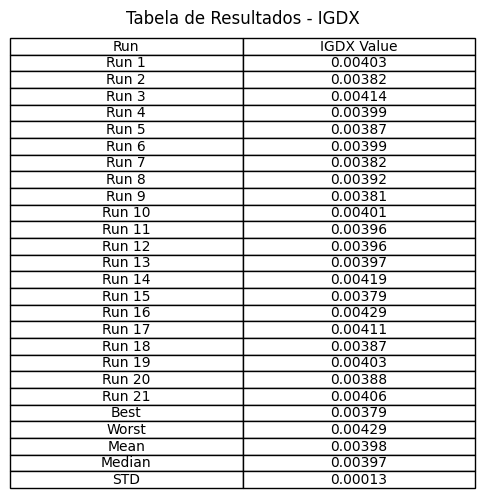

In [ ]:
# Função para calcular IGDX
def calculate_IGDX(solutions, reference_set):
    distances = cdist(solutions, reference_set)  # Calcula distâncias entre pontos
    min_distances = np.min(distances, axis=1)  # Encontra a menor distância para cada solução
    return np.mean(min_distances)  # Média das menores distâncias

# Conjunto de referência do Pareto Set verdadeiro (PS*)
num_ref_points = 100
x1_ref = np.linspace(0, 1, num_ref_points)
x2_ref = np.full(num_ref_points, 1 / (2 * n_p))  # PS Global verdadeiro
reference_PS = np.column_stack((x1_ref, x2_ref))

# Lista para armazenar os valores de IGDX em cada execução
igdx_values = []

for _ in range(num_runs):
    # Executa o algoritmo NSGA-II
    algorithm = NSGAII(problem)
    algorithm.run(200000)

    # Obtém as soluções
    solutions = np.array([[s.variables[0], s.variables[1]] for s in algorithm.result])

    # Calcula IGDX comparando as soluções obtidas com o verdadeiro PS
    igdx_value = calculate_IGDX(solutions, reference_PS)
    igdx_values.append(igdx_value)

# Cálculo dos estatísticos
best = np.min(igdx_values)
worst = np.max(igdx_values)
mean = np.mean(igdx_values)
median = np.median(igdx_values)
std_dev = np.std(igdx_values)

# Criando a tabela
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('tight')
ax.axis('off')

table_data = [["Run " + str(i+1), f"{igdx_values[i]:.5f}"] for i in range(num_runs)]
table_data.append(["Best", f"{best:.5f}"])
table_data.append(["Worst", f"{worst:.5f}"])
table_data.append(["Mean", f"{mean:.5f}"])
table_data.append(["Median", f"{median:.5f}"])
table_data.append(["STD", f"{std_dev:.5f}"])

# Adicionando a tabela no gráfico
ax.table(cellText=table_data, colLabels=["Run", "IGDX Value"], loc="center", cellLoc="center")

plt.title("Tabela de Resultados - IGDX")
plt.show()


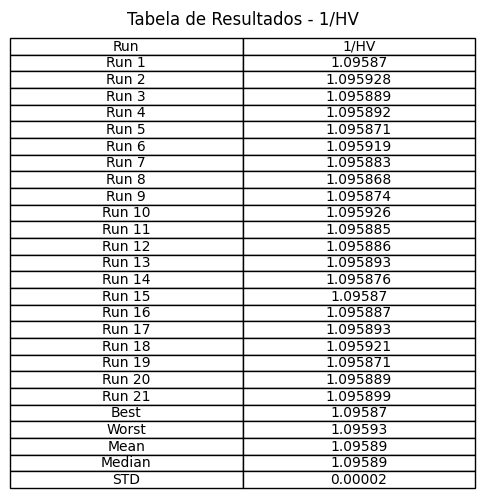

In [12]:
# Configurações do experimento
N_runs = 21
hv_values = []

reference_point = [2.5, 2.5]  # Ponto de referência ajustado para HV

for _ in range(N_runs):
    algorithm = NSGAII(problem)
    algorithm.run(20000)

    # Obtendo soluções e extraindo apenas os valores dos objetivos
    #solutions = [s.objectives for s in algorithm.result]  # Agora é uma lista de listas
    solutions = algorithm.result # This line retrieves the Solution objects

    # Extracting objective values from Solution objects
    objective_values = [s.objectives for s in solutions]

    # Calcula o HV
    hv = Hypervolume(minimum=[0, 0], maximum=reference_point).calculate(algorithm.result)
    hv_values.append(1 / hv if hv > 0 else float("inf"))  # 1/HV

# Cálculo dos estatísticos
best = np.min(hv_values)
worst = np.max(hv_values)
mean = np.mean(hv_values)
median = np.median(hv_values)
std_dev = np.std(hv_values)

# Criando a tabela
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('tight')
ax.axis('off')

table_data = [["Run " + str(i+1), round(hv_values[i], 6)] for i in range(num_runs)]
table_data.append(["Best", f"{best:.5f}"])
table_data.append(["Worst", f"{worst:.5f}"])
table_data.append(["Mean", f"{mean:.5f}"])
table_data.append(["Median", f"{median:.5f}"])
table_data.append(["STD", f"{std_dev:.5f}"])

# Adicionando a tabela no gráfico
ax.table(cellText=table_data, colLabels=["Run", "1/HV"], loc="center", cellLoc="center")

plt.title("Tabela de Resultados - 1/HV")
plt.show()


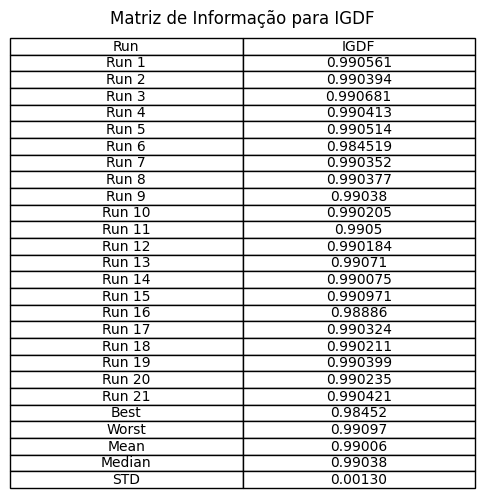

In [ ]:
# Gerando um Pareto Front verdadeiro para MMF12
true_pf_x = np.linspace(0, 1, 100)  # 100 pontos no espaço objetivo
true_pf = np.array([[x, f2([x, 0.5])] for x in true_pf_x])  # Aproximação do Pareto Front verdadeiro

# Configurações do experimento
N_runs = 21
igdf_values = []

for _ in range(N_runs):
    algorithm = NSGAII(problem)
    algorithm.run(20000)

    # Obtendo soluções e extraindo os valores dos objetivos
    solutions = np.array([s.objectives for s in algorithm.result])  # Lista de listas (f1, f2)

    # Calcula IGDF: distância média de cada ponto do verdadeiro Pareto Front ao conjunto encontrado
    distances = cdist(true_pf, solutions)  # Matriz de distâncias
    min_distances = np.min(distances, axis=1)  # Menor distância para cada ponto do PF verdadeiro
    igdf = np.mean(min_distances)  # IGDF = média dessas distâncias

    igdf_values.append(igdf)

# Estatísticas dos resultados
best = np.min(igdf_values)
worst = np.max(igdf_values)
mean = np.mean(igdf_values)
median = np.median(igdf_values)
std_dev = np.std(igdf_values)

# Plotando a tabela de resultados
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('tight')
ax.axis('off')

table_data = [["Run " + str(i+1), round(igdf_values[i], 6)] for i in range(num_runs)]
table_data.append(["Best", f"{best:.5f}"])
table_data.append(["Worst", f"{worst:.5f}"])
table_data.append(["Mean", f"{mean:.5f}"])
table_data.append(["Median", f"{median:.5f}"])
table_data.append(["STD", f"{std_dev:.5f}"])

ax.table(cellText=table_data, colLabels=["Run", "IGDF"], loc="center", cellLoc="center")

plt.title("Matriz de Informação para IGDF")
plt.show()

